In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train=pd.read_csv('train (2).csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## EDA 

In [4]:
# Checking null values and droping null values
train.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
#Getting Dummies for the object type
for i in train.columns:
  if(train[i].dtypes==object):
    train=pd.get_dummies(train,columns=[i])

In [6]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


### Finding correlation of Sale Price with other variables and keeping only those who have a stronger positive or neagtive correlation
#### we are keeping only those variables which have correlation values above 0.5 or below -0.5

In [7]:
data=pd.DataFrame()
for i in train.columns:
  temp=train['SalePrice'].corr(train[i])
  if(temp>=0.5):
    data[i]=train[i]
  if(temp<=-0.5):
    data[i]=train[i]

In [8]:
data

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA
0,7,2003,2003,856,856,1710,2,8,2,548,208500,0,0,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,1,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,223500,0,0,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,140000,1,0,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,1,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,1,0,0,1
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,0,0,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,1,0,0,0


### Visualizing the Data

In [9]:
 sns.pairplot(data,hue='SalePrice')

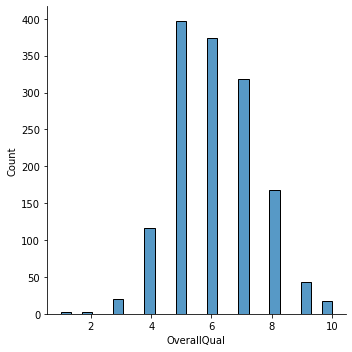

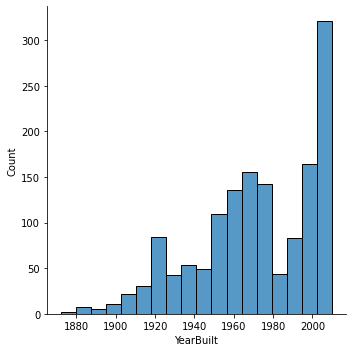

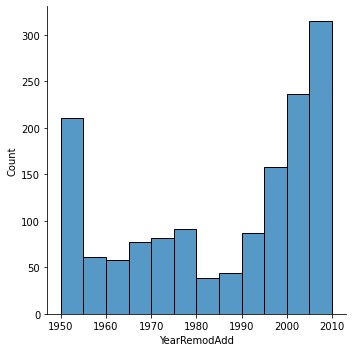

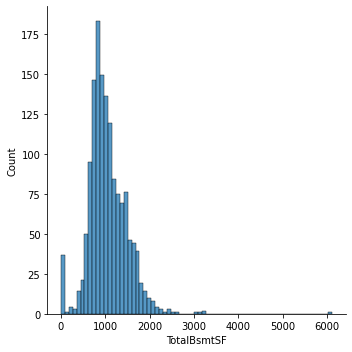

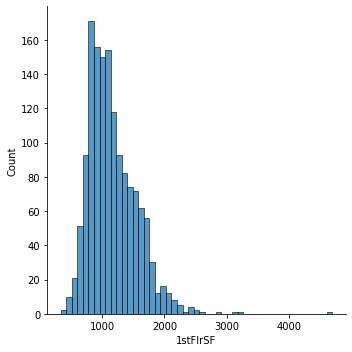

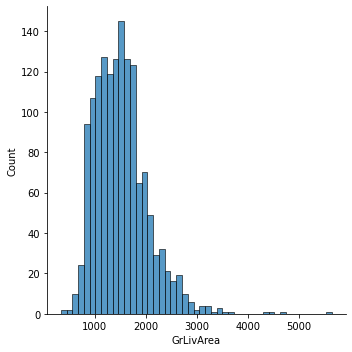

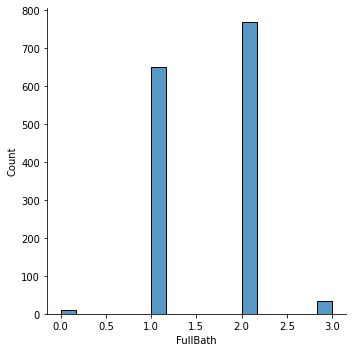

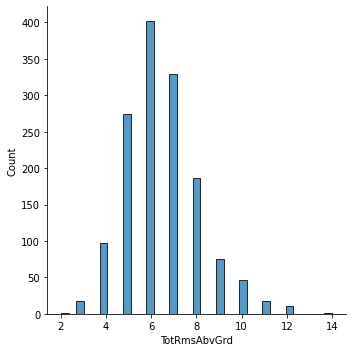

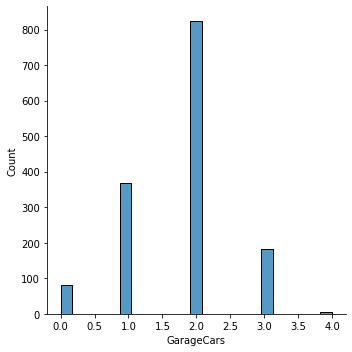

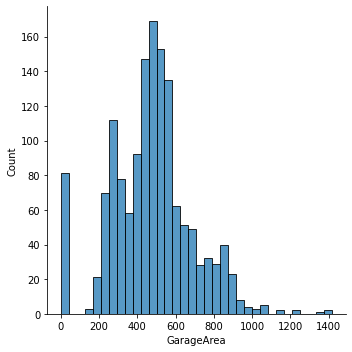

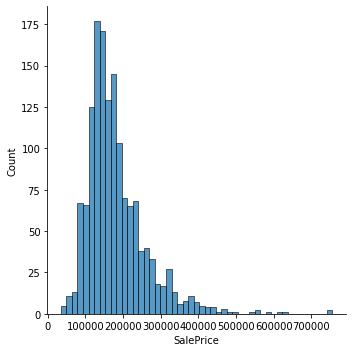

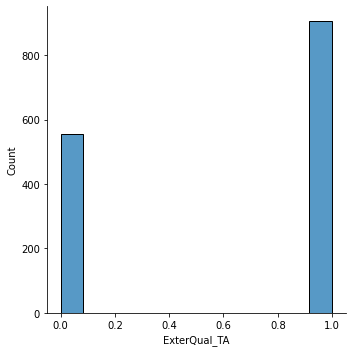

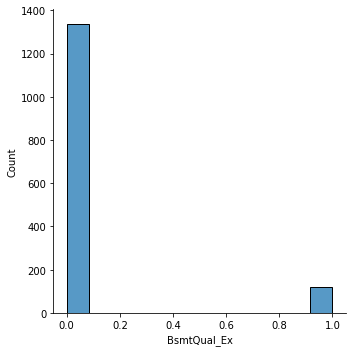

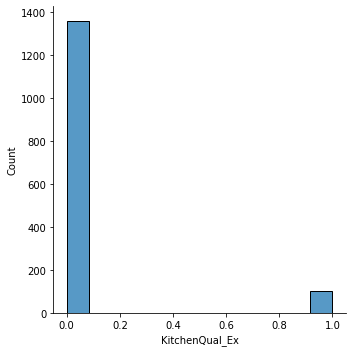

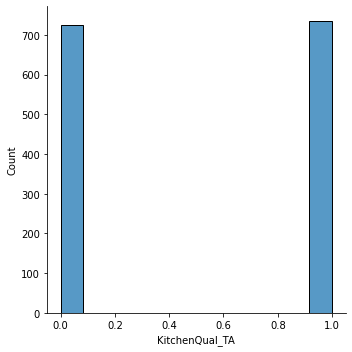

In [10]:
for i in data.columns:
    sns.displot(data[i])

<Axes: xlabel='YearBuilt', ylabel='YearRemodAdd'>

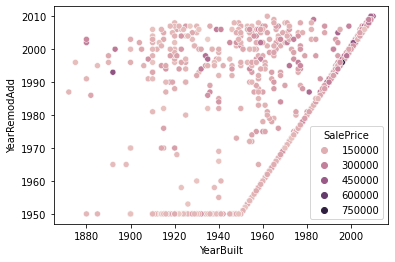

In [11]:
sns.scatterplot(data=data,x='YearBuilt',y='YearRemodAdd',hue='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='GarageArea'>

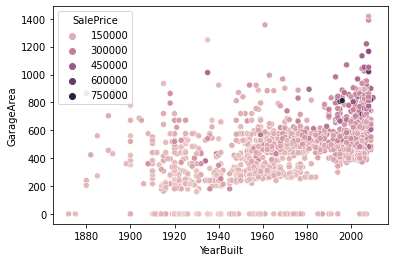

In [12]:
sns.scatterplot(data=data,x='YearBuilt',y='GarageArea',hue='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

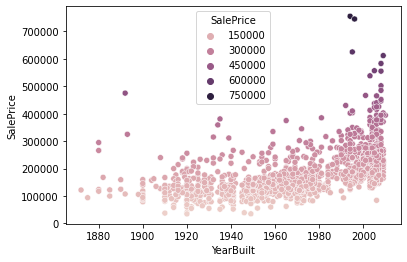

In [13]:
sns.scatterplot(data=data,x='YearBuilt',y='SalePrice',hue='SalePrice')

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

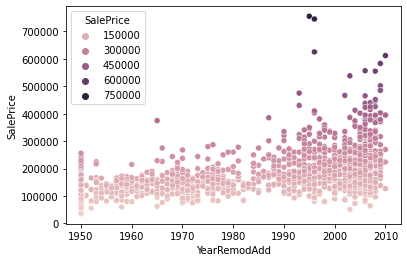

In [14]:
sns.scatterplot(data=data,x='YearRemodAdd',y='SalePrice',hue='SalePrice')

In [15]:
diff=pd.DataFrame()
diff['Difference']=data['YearRemodAdd']-data['YearBuilt']

In [16]:
temp=data.copy()
temp['diff_btw_build_remodel']=diff

<Axes: xlabel='diff_btw_build_remodel', ylabel='SalePrice'>

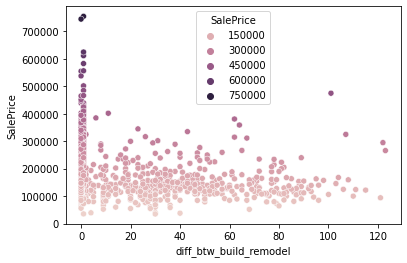

In [17]:
sns.scatterplot(data=temp,x='diff_btw_build_remodel',y='SalePrice',hue='SalePrice')

<Axes: xlabel='OverallQual', ylabel='diff_btw_build_remodel'>

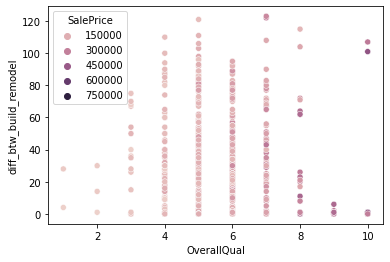

In [18]:
sns.scatterplot(data=temp,y='diff_btw_build_remodel',x='OverallQual',hue='SalePrice')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

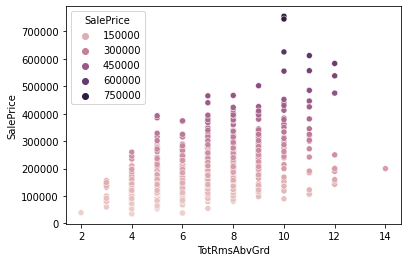

In [19]:
sns.scatterplot(data=temp,y='SalePrice',x='TotRmsAbvGrd',hue='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

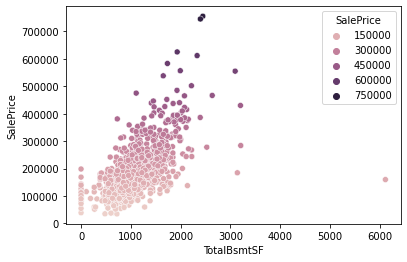

In [20]:
sns.scatterplot(data=data,y='SalePrice',x='TotalBsmtSF',hue='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

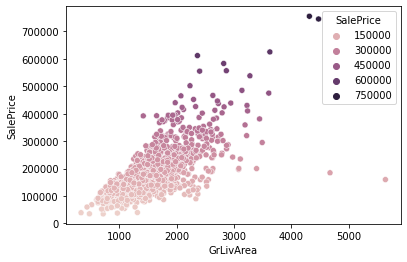

In [21]:
sns.scatterplot(data=data,y='SalePrice',x='GrLivArea',hue='SalePrice')

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

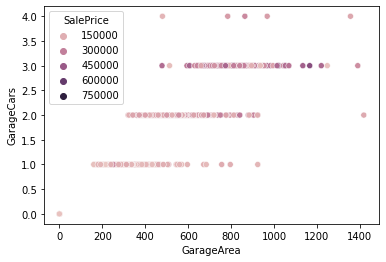

In [22]:
sns.scatterplot(data=data,x='GarageArea',y='GarageCars',hue='SalePrice')

<Axes: xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

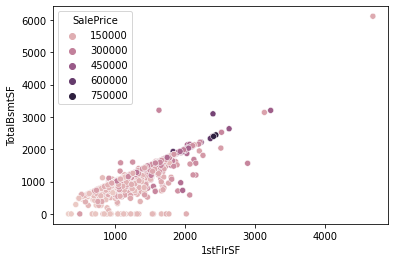

In [23]:
sns.scatterplot(data=data,x='1stFlrSF',y='TotalBsmtSF',hue='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='FullBath'>

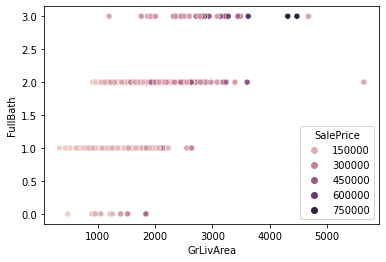

In [24]:
sns.scatterplot(data=data,y='FullBath',x='GrLivArea',hue='SalePrice')

## Insights
1. New Buildings have a greater Sales price
2. The new building which are remodeled are expensive as compared to old remodeled houses.
3. But, the old houses which are remodeled and have a better overall quality are expensive
4. Garage area or the number of cars that can fit in a garage is also affecting the sales price.But, houses with very big Garage area are not very expensive. This means people prefer houses which have a medium area parking which can fit 2-3 cars.
5. The ground floor area and basement area is mostly the same. The houses which have a smaller basement are cheaper.
6. Homes with the largest number of bathrooms and also over in an area have higher prices.
7. There is a trend seen after 1950 (approx), new houses are remodeled immediately

## Detecting Outliers Using Z scores

In [25]:
from scipy import stats
for i in data.columns:
  z = np.abs(stats.zscore(data[i]))
  print('Outliers for',i)
  print(np.where(z > 4))
  a=np.where(z > 4)
  data=data.drop(a[0],axis=0)
# Detecting and deleting outliers


Outliers for OverallQual
(array([], dtype=int64),)
Outliers for YearBuilt
(array([], dtype=int64),)
Outliers for YearRemodAdd
(array([], dtype=int64),)
Outliers for TotalBsmtSF
(array([ 332,  440,  496,  523, 1298]),)
Outliers for 1stFlrSF
(array([1020, 1368]),)
Outliers for GrLivArea
(array([ 185,  687, 1164, 1177]),)
Outliers for FullBath
(array([], dtype=int64),)
Outliers for TotRmsAbvGrd
(array([630]),)
Outliers for GarageCars
(array([], dtype=int64),)
Outliers for GarageArea
(array([ 576, 1180]),)
Outliers for SalePrice
(array([ 178,  683,  761,  795,  890, 1037, 1159, 1170]),)
Outliers for ExterQual_TA
(array([], dtype=int64),)
Outliers for BsmtQual_Ex
(array([], dtype=int64),)
Outliers for KitchenQual_Ex
(array([], dtype=int64),)
Outliers for KitchenQual_TA
(array([], dtype=int64),)


In [26]:
data.isna().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
dtype: int64

In [27]:
data.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
dtype: int64

## To improve model performance let us normalise the data 


In [28]:
for i in data.columns:
  data.rename(columns={'i ':'i'},inplace=True)

In [29]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [30]:
tp=data.drop('SalePrice',axis=1)
data_norm= norm_func(tp)
data_norm['SalePrice']=data['SalePrice']

## Model Building
### We will be using Multiple linear regression
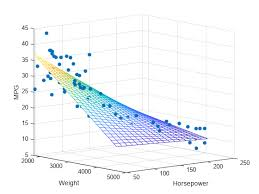

In [31]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [32]:
data_norm.rename(columns={'1stFlrSF':'First_FlrSF'},inplace=True)

In [33]:
data_norm.columns=data_norm.columns.str.replace(" ","_")


In [34]:
data_norm.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'First_FlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA', 'SalePrice'],
      dtype='object')

In [35]:
model=smf.ols("SalePrice ~OverallQual +YearBuilt +YearRemodAdd +TotalBsmtSF +First_FlrSF +GrLivArea +FullBath +TotRmsAbvGrd +GarageCars +GarageArea +ExterQual_TA +BsmtQual_Ex +KitchenQual_Ex +KitchenQual_TA ",data=data_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     582.5
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:33:55   Log-Likelihood:                -16868.
No. Observations:                1438   AIC:                         3.377e+04
Df Residuals:                    1423   BIC:                         3.385e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.427e+04   6211.624     -3.908      0.000   -3.65e+04   -1.21e+04
OverallQual     1.016e+05   9351.517     10.867      0.000    8.33e+04     1.2e+05
YearBuilt       4.113e+04   5771.661      7.127      0.000    2.98e+04    5.25e+04
YearRemodAdd    1.254e+04   3268.752      3.837      0.000    6129.576     1.9e+04
TotalBsmtSF     7.754e+04   9520.730      8.144      0.000    5.89e+04    9.62e+04
First_FlrSF     1.153e+04   1.03e+04      1.122      0.262   -8636.190    3.17e+04
GrLivArea       3.039e+05   1.48e+04     20.603      0.000    2.75e+05    3.33e+05
FullBath       -2.033e+04   6550.404     -3.103      0.002   -3.32e+04   -7479.687
TotRmsAbvGrd   -4.932e+04    1.1e+04     -4.478      0.000   -7.09e+04   -2.77e+04
GarageCars      1.425e+04      1e+04      1.424      0.155   -5378.305    3.39e+04
GarageArea      3.223e+04   1.17e+04      2.744      0.006    9192.620    5.53e+04
ExterQual_TA   -2304.7731   2605.773     -0.884      0.377   -7416.341    2806.795
BsmtQual_Ex     3.813e+04   3645.109     10.461      0.000     3.1e+04    4.53e+04
KitchenQual_Ex  3.574e+04   3913.176      9.134      0.000    2.81e+04    4.34e+04
KitchenQual_TA -5160.9515   2319.315     -2.225      0.026   -9710.594    -611.309
==============================================================================
Omnibus:                      408.313   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4621.589
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                      11.558   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If we observe the P values of this model, the varibles which have a higher P values are:
### 1) First_flrSF
### 2) FullBath
### 3) GarageCars
### 4) GarageArea
### 5) ExterQual_TA
### 6) KitchenQual_TA
### Hence we shall observe the VIF scores of each individual model

In [36]:
rsq_1=smf.ols('First_FlrSF~FullBath+GarageCars+GarageArea+ExterQual_TA+KitchenQual_TA',data=data_norm).fit().rsquared
vif_1=1/(1-rsq_1)
rsq_2=smf.ols('FullBath~First_FlrSF+GarageCars+GarageArea+ExterQual_TA+KitchenQual_TA',data=data_norm).fit().rsquared
vif_2=1/(1-rsq_2)
rsq_3=smf.ols('GarageCars~First_FlrSF+FullBath++GarageArea+ExterQual_TA+KitchenQual_TA',data=data_norm).fit().rsquared
vif_3=1/(1-rsq_3)
rsq_4=smf.ols('GarageArea~First_FlrSF+FullBath+GarageCars+ExterQual_TA+KitchenQual_TA',data=data_norm).fit().rsquared
vif_4=1/(1-rsq_4)
rsq_5=smf.ols('ExterQual_TA~First_FlrSF+FullBath+GarageCars+GarageArea+KitchenQual_TA',data=data_norm).fit().rsquared
vif_5=1/(1-rsq_5)
rsq_6=smf.ols('KitchenQual_TA~First_FlrSF+FullBath+GarageCars+GarageArea+ExterQual_TA',data=data_norm).fit().rsquared
vif_6=1/(1-rsq_6)
d1= {'Variables':['First_FlrSF','FullBath','GarageCars','GarageAre','ExterQual_TA','KitchenQual_TA'],'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6]}
vif_values=pd.DataFrame(d1)
vif_values

,Variables,VIF
0,First_FlrSF,1.372681
1,FullBath,1.502758
2,GarageCars,5.183401
3,GarageAre,4.960184
4,ExterQual_TA,2.082352
5,KitchenQual_TA,1.881915


### NO VIF value is greater than 20 so no need to eliminate any variable


## Residual Values

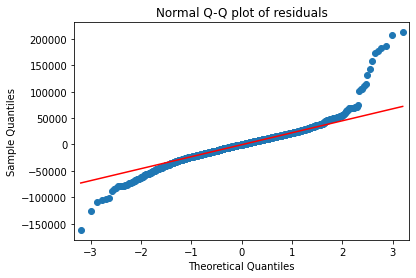

In [37]:
qqplot= sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

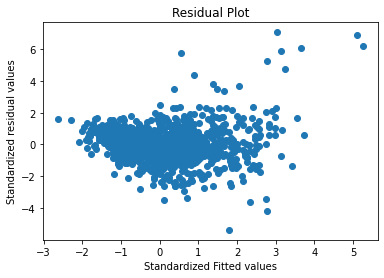

In [39]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Influence Plot to detect Outliers

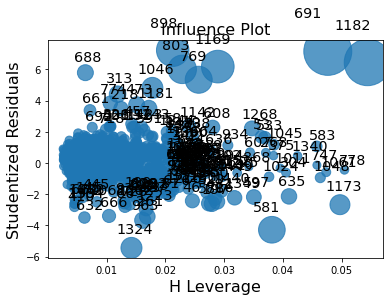

In [40]:
influence_plot(model)
plt.show()
#Index 1182,691 and such others are outliers

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [42]:
c

array([8.35554256e-06, 1.98871259e-04, 3.99743125e-06, ...,
       1.16029077e-03, 6.13446160e-05, 2.29908122e-05])

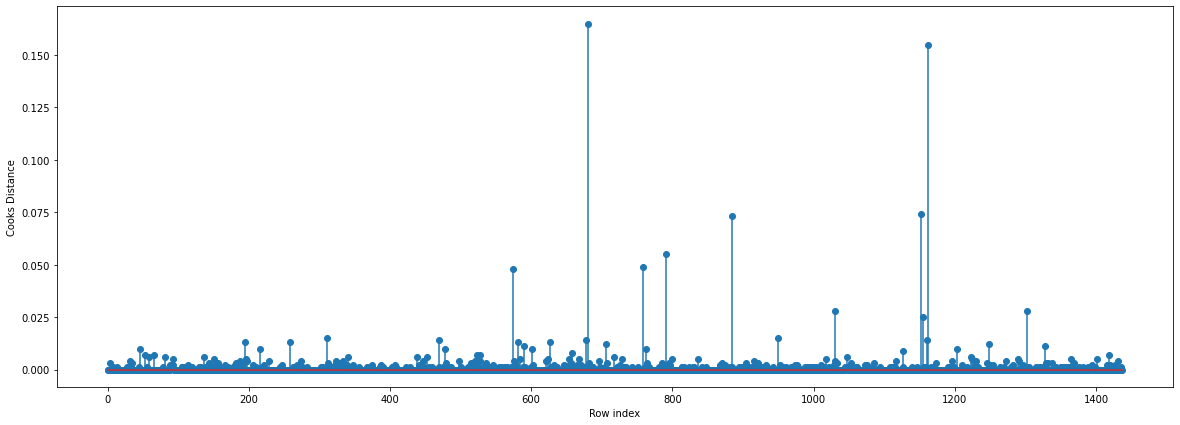

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_norm)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))
#index 677 is an outlier

(681, 0.1650952174686743)

#### Running a while loop for outlier detection and improving model accuracy

In [45]:
while np.max(c)>0.5 :
    model=smf.ols("SalePrice ~OverallQual +YearBuilt +YearRemodAdd +TotalBsmtSF +First_FlrSF +GrLivArea +FullBath +TotRmsAbvGrd +GarageCars +GarageArea +ExterQual_TA +BsmtQual_Ex +KitchenQual_Ex +KitchenQual_TA ",data=data_norm).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data_norm=data_norm.drop(data_norm.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_norm
else:
    final_model=smf.ols("SalePrice ~OverallQual +YearBuilt +YearRemodAdd +TotalBsmtSF +First_FlrSF +GrLivArea +FullBath +TotRmsAbvGrd +GarageCars +GarageArea +ExterQual_TA +BsmtQual_Ex +KitchenQual_Ex +KitchenQual_TA",data=data_norm).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8514365309429435


In [46]:
data_norm
label=data_norm.drop('SalePrice',axis=1)
target=data_norm['SalePrice']

#### Comparing The Actual value and predicted value

In [47]:
pred_target=final_model.predict(label)
result=pd.DataFrame()
result['Actual']=target
result['Predicted']=pred_target
result

,Actual,Predicted
0,208500,203741.528786
1,181500,158379.825507
2,223500,220296.085201
3,140000,182975.575255
4,250000,265259.927822
...,...,...
1455,175000,183904.548683
1456,210000,229705.806863
1457,266500,227792.870632
1458,142125,131156.289747


In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

#### Model Evaluation using R2 Score and RMSE
If value of r2 is close to 1, it means the model is perfect. If it is close to -1 it means model is very bad 

In [49]:
score=r2_score(target,pred_target)
print('r2 socre is ',score)

r2 socre is  0.8514365309429436


In [50]:
RMSE = sqrt(mean_squared_error(target,pred_target))
print("Root Mean Sqauared Error is:",RMSE)

Root Mean Sqauared Error is: 30076.455845220404


<Axes: xlabel='Actual', ylabel='Predicted'>

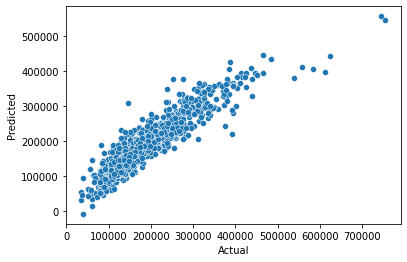

In [51]:
sns.scatterplot(data=result,x='Actual',y='Predicted')

#### The model has a good R2 as well as RMSE value. Hence, predicting the price of the house in test data

## Prediction

In [52]:
test=pd.read_csv('test (1).csv')

In [53]:
for i in test.columns:
  if(test[i].dtypes==object):
    test=pd.get_dummies(test,columns=[i])
test.rename(columns={'1stFlrSF':'First_FlrSF'},inplace=True)

In [54]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [55]:
pd.set_option('Display.max_columns',500)

In [56]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,First_FlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleT

In [57]:
test_1= test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'First_FlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'ExterQual_TA', 'BsmtQual_Ex',
       'KitchenQual_Ex', 'KitchenQual_TA']]

In [60]:
final_predict=final_model.predict(test_1)
final_predict=final_predict.astype('float32')
Predicted= pd.DataFrame(final_predict,columns=['Predicted Values'])

In [61]:
Predicted

,Predicted Values
0,480059264.0
1,637742080.0
2,700678592.0
3,692613888.0
4,626810752.0
...,...
1454,486383040.0
1455,495565248.0
1456,605401536.0
1457,483803936.0


## Conclusion